In [7]:
import requests

response = requests.get("https://et.water.ca.gov/api/data?appKey=fa40a5fc-9d1d-4056-8875-e883f8619462&targets=6,131&startDate=2020-06—01&endDate=2020-08-31&dataItems=hly-rel-hum")

print(response.text)

<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 1182244899949899896<br><br><a href='javascript:history.back();'>[Go Back]</a></body></html>


In [11]:
import requests

url = "https://et.water.ca.gov/api/data"
params = {
    "appKey": "fa40a5fc-9d1d-4056-8875-e883f8619462",
    "targets": "6",
    "startDate": "2020-06-01",
    "endDate": "2020-06-30",
    "dataItems": "hly-rel-hum"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept": "application/json"
}

response = requests.get(url, params=params, headers=headers)

print(response.text)

200
{"Data":{"Providers":[{"Name":"cimis","Type":"station","Owner":"water.ca.gov","Records":[{"Date":"2020-06-01","Julian":"153","Hour":"0100","Station":"6","Standard":"english","ZipCodes":"95618, 95617, 95616","Scope":"hourly","HlyRelHum":{"Value":"69","Qc":" ","Unit":"(%)"}},{"Date":"2020-06-01","Julian":"153","Hour":"0200","Station":"6","Standard":"english","ZipCodes":"95618, 95617, 95616","Scope":"hourly","HlyRelHum":{"Value":"70","Qc":" ","Unit":"(%)"}},{"Date":"2020-06-01","Julian":"153","Hour":"0300","Station":"6","Standard":"english","ZipCodes":"95618, 95617, 95616","Scope":"hourly","HlyRelHum":{"Value":"72","Qc":" ","Unit":"(%)"}},{"Date":"2020-06-01","Julian":"153","Hour":"0400","Station":"6","Standard":"english","ZipCodes":"95618, 95617, 95616","Scope":"hourly","HlyRelHum":{"Value":"74","Qc":" ","Unit":"(%)"}},{"Date":"2020-06-01","Julian":"153","Hour":"0500","Station":"6","Standard":"english","ZipCodes":"95618, 95617, 95616","Scope":"hourly","HlyRelHum":{"Value":"75","Qc":"

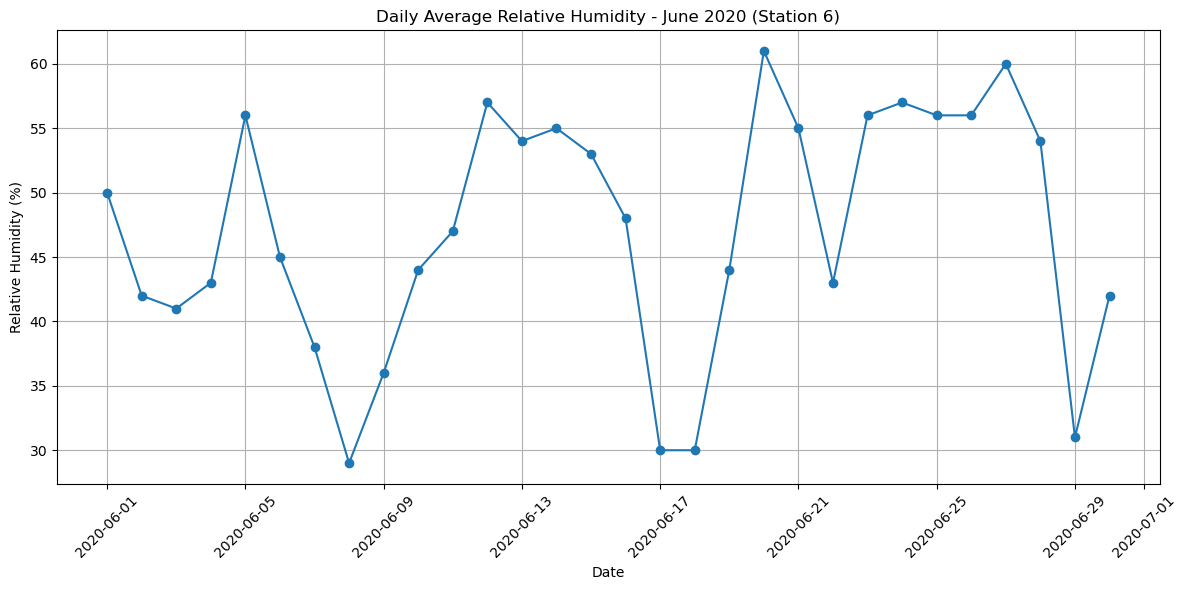

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# API setup
url = "https://et.water.ca.gov/api/data"
params = {
    "appKey": "fa40a5fc-9d1d-4056-8875-e883f8619462",
    "targets": "6",
    "startDate": "2020-06-01",
    "endDate": "2020-06-30",
    "dataItems": "day-rel-hum-avg"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept": "application/json"
}

# Send request
response = requests.get(url, params=params, headers=headers)
data_json = response.json()

# Extract records
records = data_json["Data"]["Providers"][0]["Records"]

# Parse into DataFrame
data = []
for record in records:
    date_str = record["Date"]
    dt_obj = datetime.strptime(date_str, "%Y-%m-%d")
    rel_hum = float(record["DayRelHumAvg"]["Value"])  # Corrected key here
    data.append((dt_obj, rel_hum))

df = pd.DataFrame(data, columns=["Date", "Relative Humidity (%)"])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Relative Humidity (%)"], marker='o', linestyle='-')
plt.title("Daily Average Relative Humidity - June 2020 (Station 6)")
plt.xlabel("Date")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


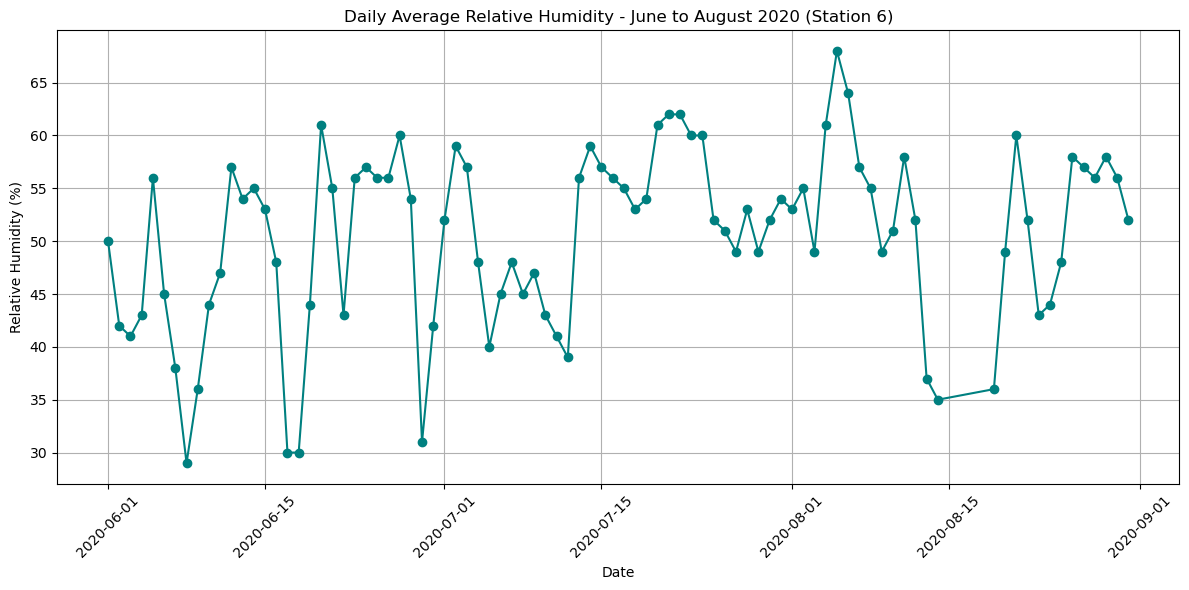

In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# API setup
url = "https://et.water.ca.gov/api/data"
params = {
    "appKey": "fa40a5fc-9d1d-4056-8875-e883f8619462",
    "targets": "6",
    "startDate": "2020-06-01",
    "endDate": "2020-08-31",
    "dataItems": "day-rel-hum-avg"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept": "application/json"
}

# Send request
response = requests.get(url, params=params, headers=headers)
response.raise_for_status()
data_json = response.json()

# Extract records
records = data_json.get("Data", {}).get("Providers", [{}])[0].get("Records", [])

# Parse into DataFrame
data = []
for record in records:
    date_str = record.get("Date")
    humidity_info = record.get("DayRelHumAvg", {})
    value = humidity_info.get("Value")
    
    if date_str and value is not None:
        try:
            dt_obj = datetime.strptime(date_str, "%Y-%m-%d")
            rel_hum = float(value)
            data.append((dt_obj, rel_hum))
        except ValueError:
            continue  # skip invalid data

df = pd.DataFrame(data, columns=["Date", "Relative Humidity (%)"])
df.sort_values("Date", inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Relative Humidity (%)"], marker='o', linestyle='-', color='teal')
plt.title("Daily Average Relative Humidity - June to August 2020 (Station 6)")
plt.xlabel("Date")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


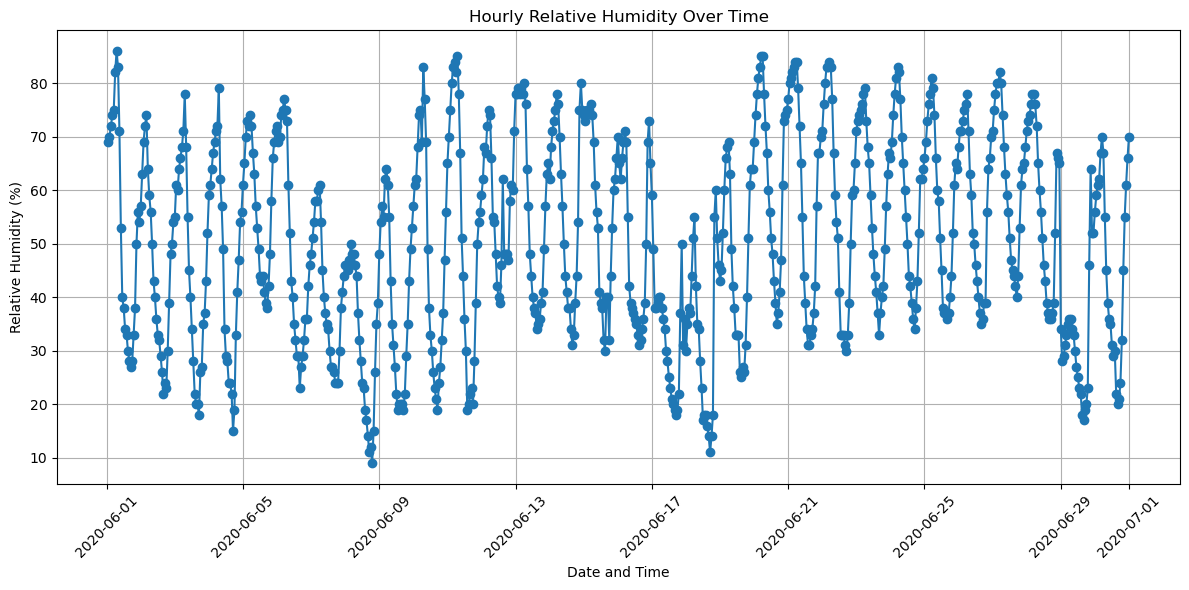

In [25]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Request parameters
url = "https://et.water.ca.gov/api/data"
params = {
    "appKey": "fa40a5fc-9d1d-4056-8875-e883f8619462",
    "targets": "6",
    "startDate": "2020-06-01",
    "endDate": "2020-06-30",
    "dataItems": "hly-rel-hum"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept": "application/json"
}

# Make request
response = requests.get(url, params=params, headers=headers)

# Parse JSON response
data_json = response.json()

# Extract the records
records = data_json["Data"]["Providers"][0]["Records"]

# Parse into a DataFrame
data = []
for record in records:
    hour = record['Hour'].zfill(4)  # Ensure it's like '0100', '2400'
    if hour == "2400":
        dt_obj = datetime.strptime(record["Date"], "%Y-%m-%d") + pd.Timedelta(days=1)
        dt_obj = dt_obj.replace(hour=0, minute=0)
    else:
        hour_formatted = hour[:2] + ":00"
        dt_str = f"{record['Date']} {hour_formatted}"
        dt_obj = datetime.strptime(dt_str, "%Y-%m-%d %H:%M")

    rel_hum = int(record["HlyRelHum"]["Value"])
    data.append((dt_obj, rel_hum))

df = pd.DataFrame(data, columns=["Datetime", "Relative Humidity (%)"])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Datetime"], df["Relative Humidity (%)"], marker='o', linestyle='-')
plt.title("Hourly Relative Humidity Over Time")
plt.xlabel("Date and Time")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
